In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('covtype.csv')
# df.head()

In [4]:

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Compute Pearson correlation between features and the target
correlation_matrix = X_train.join(y_train).corr()  # Joining X and y for correlation
target_correlation = correlation_matrix['Cover_Type'].drop('Cover_Type')  # Drop the target itself

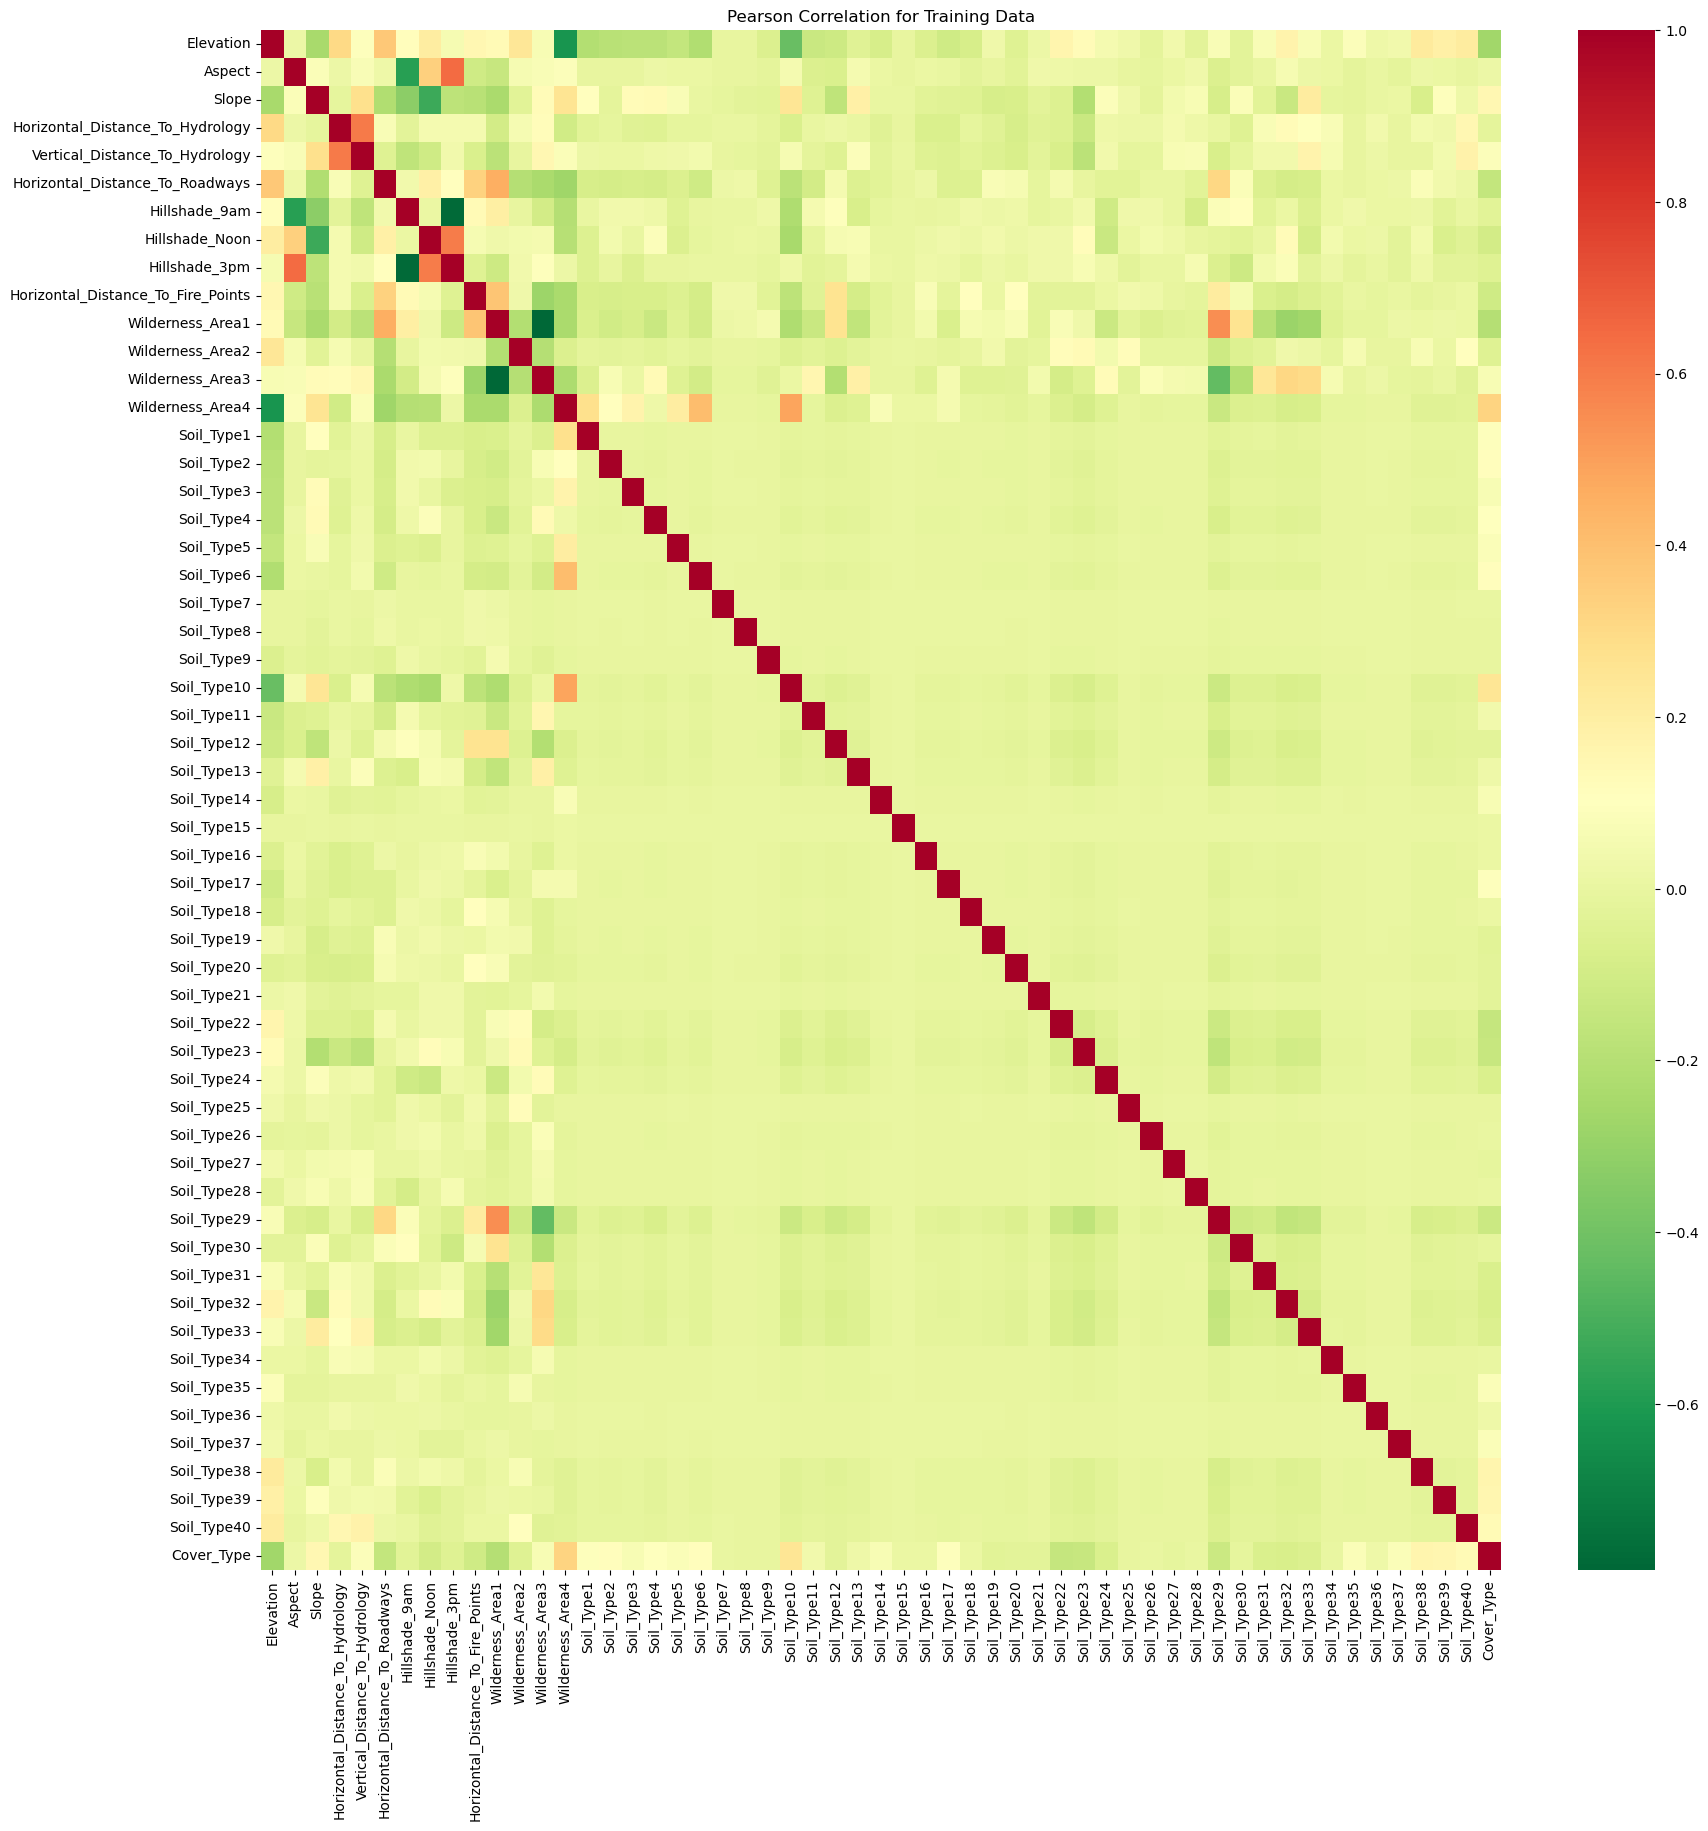

In [23]:
plt.figure(figsize=(20,20)) 
sns.heatmap(correlation_matrix, cmap='RdYlGn_r')
plt.title("Pearson Correlation for Training Data")
plt.show()

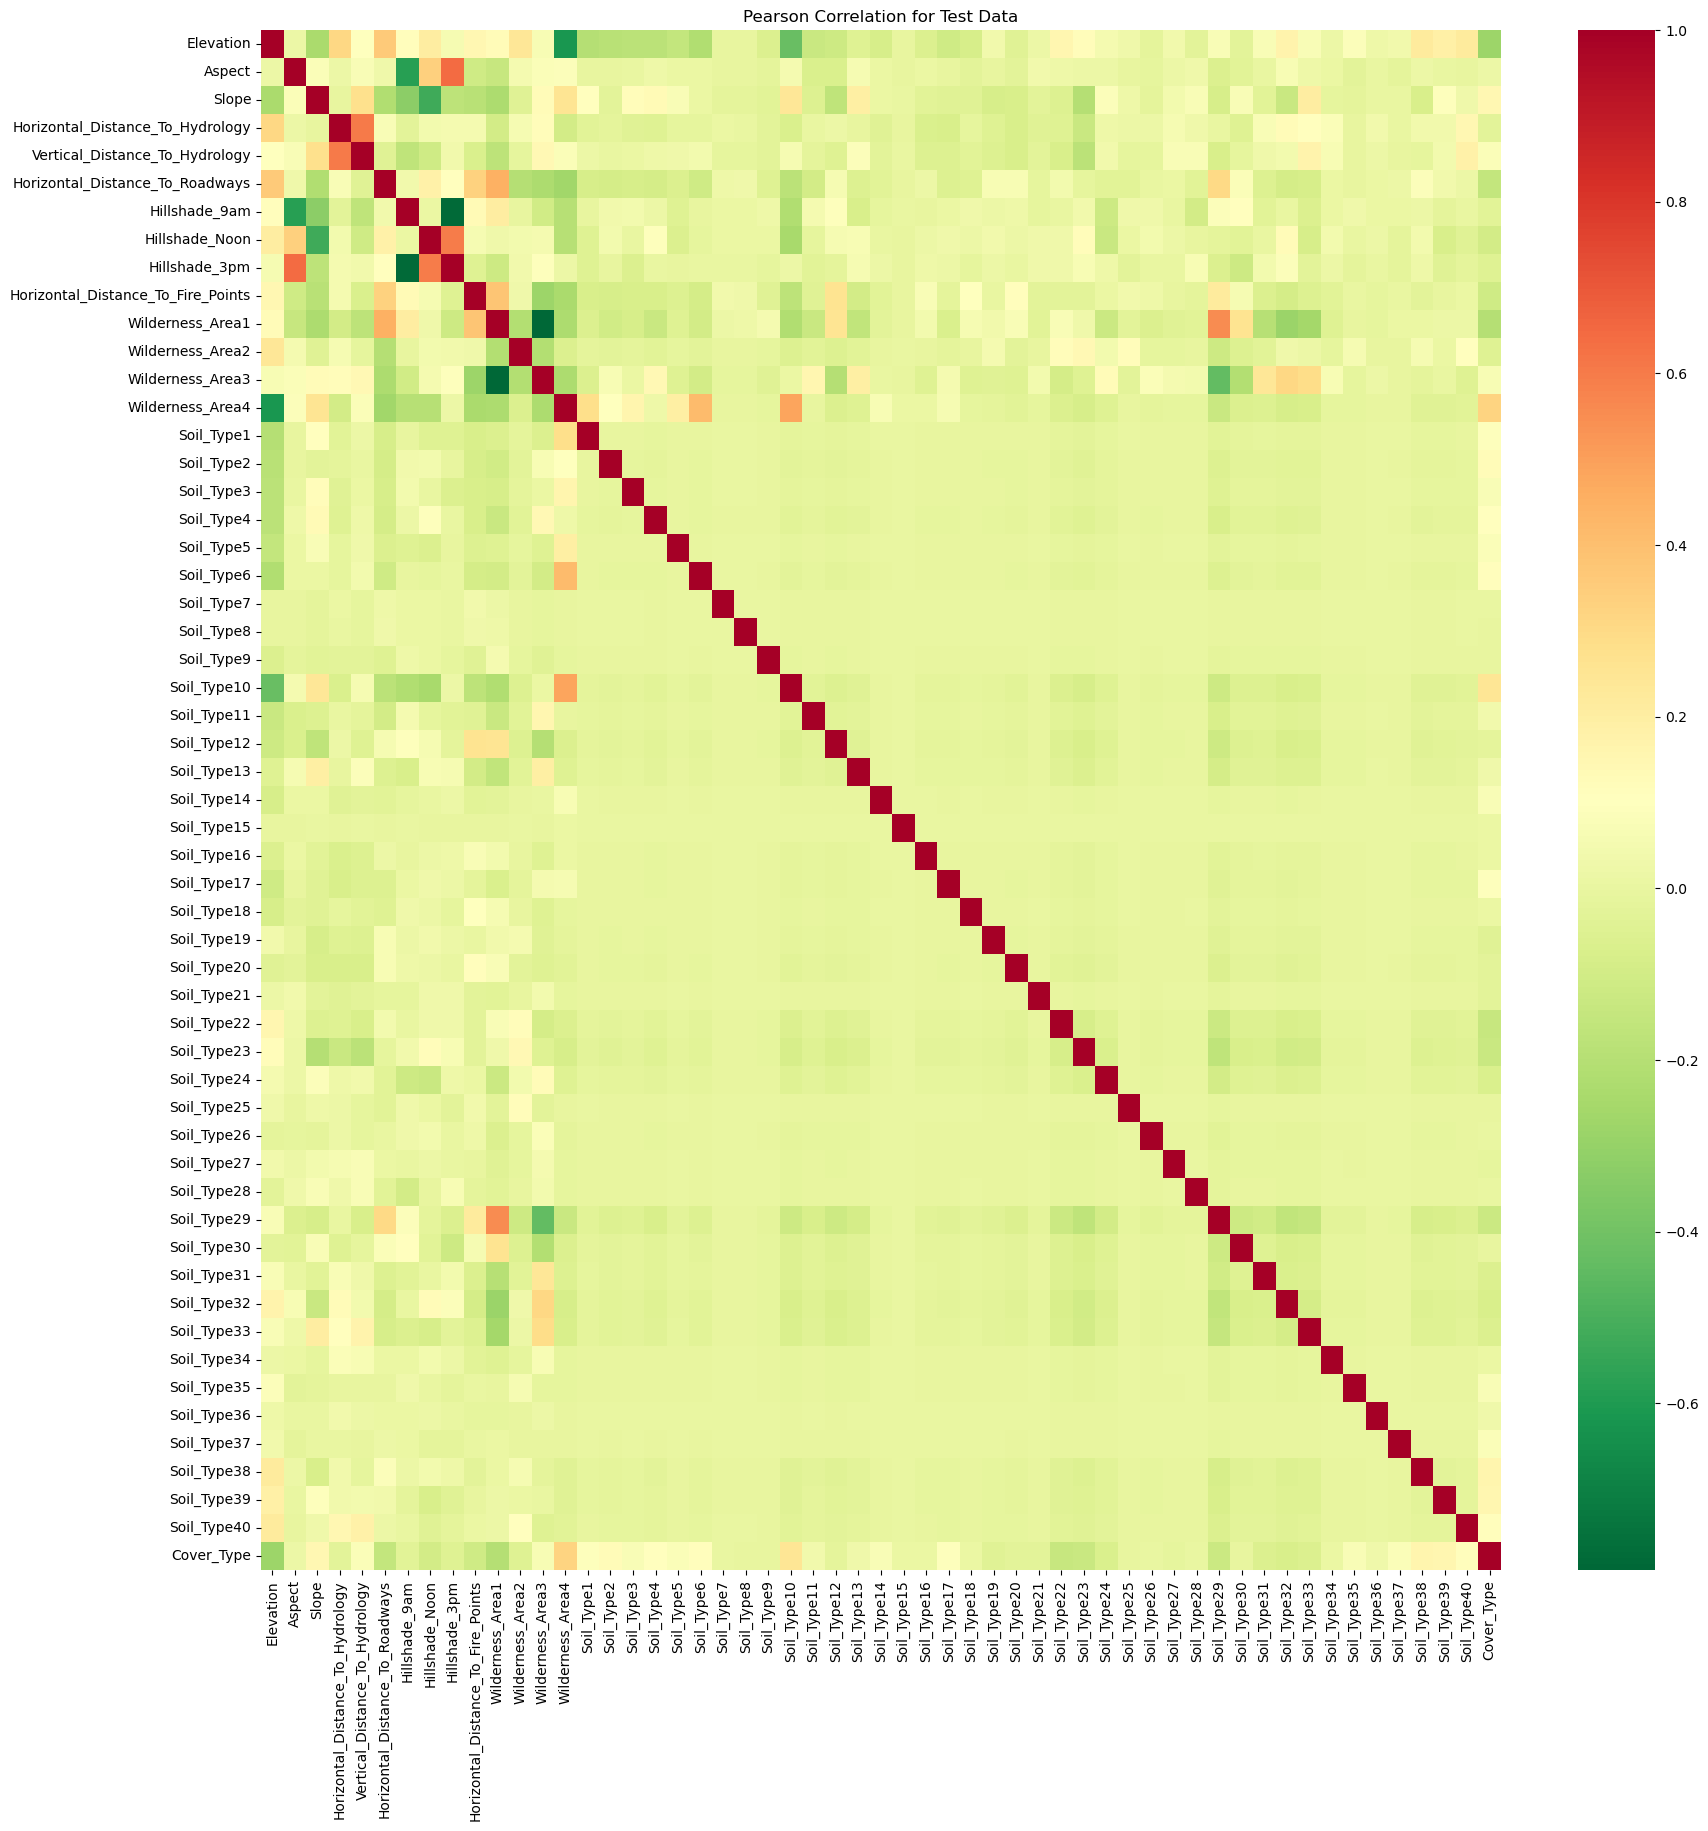

In [24]:
correlation_matrix = X_test.join(y_test).corr()  
plt.figure(figsize=(20,20)) 
sns.heatmap(correlation_matrix, cmap='RdYlGn_r')
plt.title("Pearson Correlation for Test Data")
plt.show()

In [19]:
# Select features with a threshold for correlation 
threshold = 0.1
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()

In [20]:
print(selected_features)

['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area4', 'Soil_Type2', 'Soil_Type6', 'Soil_Type10', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [21]:
# Reduce X_train and X_test to the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [22]:
X_train_selected.to_csv('X_train.csv', index=False)
X_test_selected.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)  # Set index=False
y_test.to_csv('y_test.csv', index=False) 